In [1]:
import setGPU

from keras.models import load_model, Model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import shutil
import scipy.io as sio
#from scripts.cnn_custom_ae_train import custom_generator

setGPU: Setting GPU to: 1


Using TensorFlow backend.
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/

In [2]:
!which python

/home/vuu/anaconda3/envs/tfpy3_exp/bin/python


In [3]:
#load model
def load_ae_model():
    #cnn_ae = load_model("../model/130219/cnn_ae_movie_data_130219.h5")
    #cnn_ae = load_model("../model/150219/cnn_ae_150219.h5")
    #cnn_ae = load_model("../model/140219/cnn_ae_140219.h5")
    #cnn_ae = load_model("../model/210219/cnn_ae_md_210219_3.7lac.h5")
    #cnn_ae = load_model("../model/120319/cnn_ae_movie_data_120319.h5")
    #cnn_ae = load_model("../model/140319/cnn_ae_md_140319.h5")
    #cnn_ae = load_model("../model/310319/cnn_ae_md_310319_UNET_final.h5")
    #cnn_ae = load_model("../model/080419/cnn_ae_080419_final_14x14x16.h5")
    cnn_ae = load_model("../model/100419/cnn_ae_100419_final_cnn3132.h5")
    return cnn_ae

In [4]:
#img_path = "/mnt/disks/slow1/video_processing/exp/AE_arch/data/movie_data/friends_season_10_frames/"
#img_path = "/mnt/disks/slow1/video_processing/exp/AE_arch/data/movie_data/test_200/"
img_path = "/home/yonatan/vacation_home/yono/extract_new/testcase_images/"
#img_path = '/mnt/disks/slow1/video_processing/extract/test-ym_pp/breaking_bad_s01e04-1262/'

In [5]:
# read image given a file path
def read_image(filenames):
    images = []
    for fname in filenames:
        #print(fname)
        img = cv2.imread(fname)
        res_img = cv2.resize(img, (224, 224))
        res_img = res_img/255.
        images.append(res_img)
    return images

In [7]:
#use ImageDataGenerator to predict outputs
def predict_res_IDG():
    test_gen = ImageDataGenerator(rescale=1./255)
    test_datagen = test_gen.flow_from_directory(img_path, target_size=(224, 224), color_mode='rgb', batch_size=12)
    file_names = test_datagen.filenames
    nb_samples = len(file_names)
    cnn_ae = load_ae_model()
    predict_out = cnn_ae.predict_generator(test_datagen, steps=int(nb_samples/12))
    #print(predict_out.shape)
    return predict_out, file_names

In [8]:
#use custom generator to predict outtputs
def predict_res_cg():
    nb_samples = len(os.listdir(img_path+'frames'))
    file_names = os.listdir(img_path+'frames')
    filenames = []
    for fname in file_names:
        comp_file_path = img_path + 'frames/'+fname
        filenames.append(comp_file_path)
    batch_size = 12
    target_size = 128
    test_datagen = custom_generator(img_path, file_names, batch_size, target_size)
    cnn_ae = load_ae_model()
    predict_out = cnn_ae.predict_generator(generator=test_datagen, steps=int(nb_samples/batch_size))
    print(predict_out.shape)
    return predict_out, filenames

In [9]:
predict_out, filenames = predict_res_IDG()
file_names = []
for filename in filenames:
    file_names.append(img_path+filename)
inp_images = read_image(file_names)
in_images = np.array(inp_images)
noisy_in_images = in_images + 0.3*np.random.normal(loc=0.0, scale=1.0, size=in_images.shape)
#print(inp_images[0].shape)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yonatan/vacation_home/yono/extract_new/testcase_images/'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

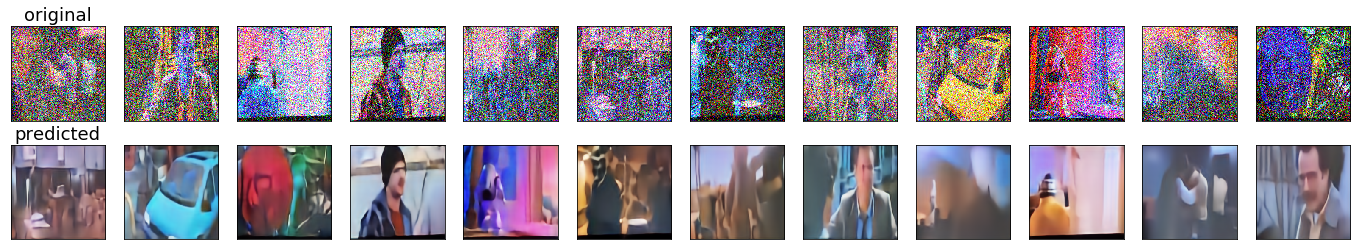

In [8]:
n = 12
plt.figure(figsize=(24,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    if i == 0:
        plt.title('original', fontsize=18)
    plt.imshow(noisy_in_images[i].reshape(224,224,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+1+n)
    if i == 0:
        plt.title('predicted', fontsize=18)
    plt.imshow(predict_out[i].reshape(224, 224, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
def model_load_encoder():
    ae = load_model("../model/080419/cnn_ae_080419_14x14x16.h5")
    encoder = Model(inputs=ae.input, outputs=ae.get_layer('encoder').output)
    return encoder

In [6]:
def remove_existing_test_fv():
    #img_path = '/mnt/disks/slow1/video_processing/extract/'
    img_path = '/mnt/disks/slow1/vacation_home/yono/extract/'
    for p_fold_name in os.listdir(img_path):
        sub_fold_path = img_path + p_fold_name
        for s_fold_name in os.listdir(sub_fold_path):
            sub_sub_fold_path = sub_fold_path + '/' + s_fold_name
            for f_fold in os.listdir(sub_sub_fold_path):
                print(f_fold)
                if f_fold == 'feature_vectors_oid_prelogits':
                    comp_path = sub_sub_fold_path + '/' + f_fold
                    shutil.rmtree(comp_path)

In [5]:
remove_existing_test_fv()

1.jpg
9.jpg
7.jpg
4.jpg
scalars
12.jpg
5.jpg
20.jpg
11.jpg
15.jpg
19.jpg
14.jpg
16.jpg
0.jpg
21.jpg
2.jpg
feature_vectors_oid_prelogits
17.jpg
feature_vectors_plf
3.jpg
10.jpg
8.jpg
6.jpg
18.jpg
feature_vectors_oid
13.jpg
feature_vectors
9.jpg
7.jpg
scalars
12.jpg
20.jpg
11.jpg
15.jpg
19.jpg
14.jpg
16.jpg
21.jpg
22.jpg
25.jpg
feature_vectors_oid_prelogits
17.jpg
feature_vectors_plf
10.jpg
8.jpg
24.jpg
6.jpg
18.jpg
23.jpg
feature_vectors_oid
13.jpg
feature_vectors
1.jpg
9.jpg
7.jpg
4.jpg
scalars
12.jpg
5.jpg
20.jpg
11.jpg
15.jpg
19.jpg
14.jpg
16.jpg
0.jpg
21.jpg
2.jpg
22.jpg
25.jpg
feature_vectors_oid_prelogits
17.jpg
feature_vectors_plf
3.jpg
10.jpg
8.jpg
24.jpg
6.jpg
18.jpg
23.jpg
feature_vectors_oid
13.jpg
feature_vectors
1.jpg
9.jpg
7.jpg
4.jpg
scalars
12.jpg
5.jpg
20.jpg
11.jpg
15.jpg
19.jpg
14.jpg
16.jpg
0.jpg
21.jpg
2.jpg
22.jpg
feature_vectors_oid_prelogits
17.jpg
feature_vectors_plf
3.jpg
10.jpg
8.jpg
24.jpg
6.jpg
18.jpg
23.jpg
feature_vectors_oid
13.jpg
feature_vectors
1.jpg
9

In [8]:
def rename_folder_name():
    #img_path = '/mnt/disks/slow1/video_processing/extract/'
    img_path = '/mnt/disks/slow1/video_processing/small_video_clip_frames_keras/small_video_clip_frames/'
    for p_fold_name in os.listdir(img_path):
        sub_fold_path = img_path + p_fold_name
        for s_fold_name in os.listdir(sub_fold_path):
            sub_sub_fold_path = sub_fold_path + '/' + s_fold_name
            for f_fold in os.listdir(sub_sub_fold_path):
                #print(sub_sub_fold_path+'/'+f_fold)
                if f_fold == '=feature_vectors_cnn6l_3136':
                    #print(f_fold)
                    dst_path = sub_sub_fold_path + '/' + 'feature_vectors_cnn6l_3136'
                    comp_path = sub_sub_fold_path + '/' + f_fold
                    #shutil.rmtree(comp_path)
                    #os.renames(comp_path, dst_path)
                    shutil.move(comp_path, dst_path)

In [9]:
rename_folder_name()

In [11]:
def extract_feature_with_filenames_cg():
    img_path = '/mnt/disks/slow1/video_processing/extract/'
    cnn_ae = model_load_encoder()
    for p_fold_name in os.listdir(img_path):
        sub_fold_path = img_path + p_fold_name
        for s_fold_name in os.listdir(sub_fold_path):
            sub_sub_fold_path = sub_fold_path + '/' + s_fold_name + '/'
            no_of_images = len(os.listdir(sub_sub_fold_path+'/'+'frames'))
            batch_size = no_of_images
            #print(sub_sub_fold_path, batch_size)
            test_filenames = os.listdir(sub_sub_fold_path+'/'+'frames')
            #print(test_filenames)
            test_datagen = custom_generator(sub_sub_fold_path, test_filenames, batch_size, 224)
            predict_out = cnn_ae.predict_generator(test_datagen, steps=int(no_of_images/batch_size))
            
            #create folder in the path to store feature vector
            dst_file_path = sub_sub_fold_path + '/' + '=feature_vectors_cnn6l_3136'
            if not os.path.exists(dst_file_path):
                os.makedirs(dst_file_path)
            fname = s_fold_name+'.mat'
            final_dst_path = dst_file_path + '/'+fname
            sio.savemat(final_dst_path, {'logits':predict_out})

In [12]:
extract_feature_with_filenames_cg()

In [8]:
"""
extract features, store feature vector with file name in a mat file
"""
def extract_feature_with_filenames_idg():
    img_path = '/mnt/disks/slow1/video_processing/extract/'
    for p_fold_name in os.listdir(img_path):
        sub_fold_path = img_path + p_fold_name
        for s_fold_name in os.listdir(sub_fold_path):
            sub_sub_fold_path = sub_fold_path + '/' + s_fold_name
            no_of_images = len(os.listdir(sub_sub_fold_path+'/'+'frames'))
            cnn_ae = model_load_encoder()
            nb_batch_size = no_of_images
            
            #create generator and call predict_generator on model
            test_datagen = ImageDataGenerator(rescale=1./255)
            test_generator = test_datagen.flow_from_directory(sub_sub_fold_path, target_size=(128,128), color_mode='rgb', batch_size=nb_batch_size)
            file_names = test_generator.filenames
            nb_samples = len(file_names)
            predict_out = cnn_ae.predict_generator(test_generator, steps=int(nb_samples/nb_batch_size))

            #create folder in the path to store feature vector
            dst_file_path = sub_sub_fold_path + '/' + 'feature_vectors_ae_unet'
            if not os.path.exists(dst_file_path):
                os.makedirs(dst_file_path)
            fname = s_fold_name+'.mat'
            final_dst_path = dst_file_path + '/'+fname
            sio.savemat(final_dst_path, {'logits':predict_out, 'filenames':test_generator.filenames})
        
        """
        is_frames = False
        for f_name in os.listdir(sub_sub_fold_path):
#            print(f_name)
            if f_name == 'frames':
                continue
            else:
                src_file_path = sub_sub_fold_path + '/' + f_name               
                dst_file_path = sub_sub_fold_path + '/' + 'frames' + '/' + f_name
                #print(src_file_path)
                #print(dst_file_path)
                shutil.move(src_file_path, dst_file_path)
                
                is_frames = True
                f_path = sub_sub_fold_path + '/' + f_name
                print(f_path)
                break
                
        if is_frames == False:
            frames_path = sub_sub_fold_path + '/' + 'frames'
            os.makedirs(frames_path)"""

In [10]:
extract_feature_with_filenames()

Found 22 images belonging to 1 classes.


/home/dell/anaconda3/envs/tf_py3/lib/python3.6/site-packages/scipy/io/matlab/miobase.py:414: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  arr[empties] = ' '


Found 20 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 27 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 24 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


In [53]:
"""
Use this when each sub-folder is being passed to extract features directly
frames/images should be one level up to pass to ImageDataGenerator
"""
def extract_features_directly():
    img_path = '/mnt/disks/slow1/video_processing/extract/test-ym/'
    no_of_images = len(os.listdir(img_path+'/'+'breaking_bad_s01e05-290'))
    cnn_ae = model_load_encoder()
    nb_batch_size = no_of_images
    
    #call generator to extract features
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(img_path, target_size=(128,128), color_mode='rgb', batch_size=nb_batch_size)
    file_names = test_generator.filenames
    nb_samples = len(file_names)
    predict_out = cnn_ae.predict_generator(test_generator, steps=int(nb_samples/nb_batch_size))

    #create path to store feature vectors in the form of .mat file
    dst_file_path = img_path + 'breaking_bad_s01e05-290' + '/' + 'feature_vector_ae'
    if not os.path.exists(dst_file_path):
        os.makedirs(dst_file_path)

    fname = 'breaking_bad_s01e05-290.mat'
    final_dst_path = dst_file_path + '/'+fname
    sio.savemat(final_dst_path, {'logits':predict_out})

Found 118 images belonging to 5 classes.


In [3]:
"""
use this when you have images in multiple sub-folders
frames/images path should be at three level up
"""
def extract_features_from_sub_folders()
    img_path = "/mnt/disks/slow1/video_processing/small_video_clip_frames_keras/small_video_clip_frames/"
    for sub_path in os.listdir(img_path):
        comp_sub_path = img_path + sub_path
        for sub_sub_path in os.listdir(comp_sub_path):
            comp_path = comp_sub_path + '/'+ sub_sub_path + '/' + 'frames'
            gen_path = comp_sub_path + '/' + sub_sub_path
            no_of_images = len(os.listdir(comp_path))
            nb_batch_size = no_of_images 
            
            #create generator and call predict_generator
            test_datagen = ImageDataGenerator(rescale=1./255)
            test_generator = test_datagen.flow_from_directory(gen_path, target_size =(128,128), color_mode='rgb', batch_size=nb_batch_size)
            file_names = test_generator.filenames
            nb_samples = len(file_names)
            cnn_ae = model_load_encoder()
            predit_out = cnn_ae.predict_generator(test_generator, steps=int(nb_samples/nb_batch_size))
            
            #create a folder to store feature vectors in the form of .mat file
            dst_file_path = gen_path + '/' + feature_vectors_ae
            if not os.path.exists(dst_file_path):
                os.makedirs(dst_file_path)
            fname = sub_sub_path+'.mat'
            dst_fin_file_path = dst_file_path + '/' + fname
            sio.savemat(dst_fin_file_path, predict_out)

17
Found 17 images belonging to 1 classes.


NameError: name 'feature_vectors_ae' is not defined

In [ ]:
def test_model_encoder(img, encoder):
    learn_codes = encoder.predict(img)
    return learn_codes

In [ ]:
def decode_img(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
#    print(type(img_data), img_data.shape)
    return img_data

In [ ]:
def get_img(path):
    img = cv2.imread(path)
    resized_img = cv2.resize(img, (128, 128))
    return resized_img

In [ ]:
def load_test_data(path):
    x_test = []
    
    for sample in os.listdir(path):
        comp_file_path = path+'/'+sample
        x = get_img(comp_file_path)
        x_test.append(x)
        
    return x_test

In [1]:
img_path = "/mnt/disks/slow1/video_processing/exp/AE_arch/data/movie_data/test_200/477505.jpg"
img = decode_img(img_path)
encoder = model_load_encoder()
#print(img.shape)
learn_codes = test_model_encoder(img, encoder)

"""
plt.figure(figsize=(6,6))
plt.scatter(learn_codes[:,0], learn_codes[:,1])
plt.colorbar()
plt.show()"""

NameError: name 'decode_img' is not defined

In [ ]:
#read and disply original images by giving path using matplot lib
def read_display_images(path):
    images = []
    for fname in os.listdir(path):
        f_path = path + '/' + fname
        img = cv2.imread(f_path)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        
    n = int(len(images)/2)
    print(n)
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(images[i].reshape(128,128,3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(images[i].reshape(128, 128, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def display_encoder_embeddings():
    encoded_imgs = encoder.predict(x_test)
    print(encoded_imgs.shape)
    n = 10
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(encoded_imgs[i].reshape(32, 8*8).T) # 3 layer network
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def reconstructed_output_decoder():
    decoded_imgs = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(img_height,img_width,3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(img_height, img_width, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()